### Capstone Project

### 1. Downloading dependencies

In [1]:
# Plotting modules
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Data analysis 
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# JSON files
import json
from pandas.io.json import json_normalize

# KMeans method clustering
from sklearn.cluster import KMeans

In [2]:
# Data scrapping
import requests
from bs4 import BeautifulSoup

In [3]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [4]:
# For latitude and longitude values
from geopy.geocoders import Nominatim

In [5]:
conda install -c conda-forge folium

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [6]:
# Visualization library
import folium

### 2. Getting and extracting data from wikipedia

In [7]:
wikiPostalCodes = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M").text
soup = BeautifulSoup(wikiPostalCodes,'lxml')

In [8]:
# Showing data 20 first and 20 last lines od data
result = soup.prettify().splitlines()
print('\n'.join(result[:20] + result[-20:]))

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],"wgRequestId":"XnDYkwpAIIQAATDHjswAAACU","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":945633050,"wgRevisionId":945633050,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Article

In [9]:
# Finding wikitable sortable class to find
My_table = soup.find('table',{'class':'wikitable sortable'})

In [10]:
# Extract all the links within <tr>
rows = My_table.findAll('tr')

In [11]:
# Creating empty list
new_data = []

In [12]:
# Loop to append right values to new_data list
for row in rows:
    children = row.findChildren(recursive=False)
    row_text = []
    for child in children: 
        clean_text = child.text 
        clean_text = clean_text.split('&#91;')[0]
        clean_text = clean_text.split('&#160;')[-1]
        clean_text = clean_text.strip()
        row_text.append(clean_text)
    new_data.append(row_text)

In [13]:
# First 20 items of new_data
new_data[:20]

[['Postcode', 'Borough', 'Neighbourhood'],
 ['M1A', 'Not assigned', 'Not assigned'],
 ['M2A', 'Not assigned', 'Not assigned'],
 ['M3A', 'North York', 'Parkwoods'],
 ['M4A', 'North York', 'Victoria Village'],
 ['M5A', 'Downtown Toronto', 'Harbourfront'],
 ['M6A', 'North York', 'Lawrence Heights'],
 ['M6A', 'North York', 'Lawrence Manor'],
 ['M7A', 'Downtown Toronto', "Queen's Park"],
 ['M8A', 'Not assigned', 'Not assigned'],
 ['M9A', 'Etobicoke', 'Islington Avenue'],
 ['M1B', 'Scarborough', 'Rouge'],
 ['M1B', 'Scarborough', 'Malvern'],
 ['M2B', 'Not assigned', 'Not assigned'],
 ['M3B', 'North York', 'Don Mills North'],
 ['M4B', 'East York', 'Woodbine Gardens'],
 ['M4B', 'East York', 'Parkview Hill'],
 ['M5B', 'Downtown Toronto', 'Ryerson'],
 ['M5B', 'Downtown Toronto', 'Garden District'],
 ['M6B', 'North York', 'Glencairn']]

### 3. Data Frame defining

In [14]:
# Describtion of dataframe columns
column_names = ['PostalCode', 'Borough', 'Neighborhood']

# Creating Data Drame
df = pd.DataFrame(new_data[1:], columns=column_names)

In [15]:
df.head()

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [16]:
df.shape

(287, 3)

### 4. Cleaning Data Frame

In [17]:
# If Boroughs is "Not assigned" then drop it
df.drop(df[df['Borough']=='Not assigned'].index, inplace=True)
df.reset_index(inplace=True, drop=True)
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,Lawrence Heights
4,M6A,North York,Lawrence Manor


In [260]:
df.shape

(210, 3)

In [18]:
# If Borough is not assigned to neighborhood, then the neighborhood will be the same as the borough.
df['Neighborhood'].where(df['Neighborhood'] != 'Not assigned', df['Borough'], inplace=True)
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,Lawrence Heights
4,M6A,North York,Lawrence Manor


In [62]:
df.shape

(210, 3)

In [19]:
# If one neighborhood can exist in one postal code area then combine it
df=df.groupby("PostalCode").agg(lambda x:','.join(set(x)))
df.head()

,Borough,Neighborhood
PostalCode,,
M1B,Scarborough,"Malvern,Rouge"
M1C,Scarborough,"Rouge Hill,Highland Creek,Port Union"
M1E,Scarborough,"Guildwood,West Hill,Morningside"
M1G,Scarborough,Woburn
M1H,Scarborough,Cedarbrae


In [65]:
df.shape

(103, 2)

In [20]:
df=df.reset_index()

In [40]:
df.head(5)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern,Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill,Highland Creek,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,West Hill,Morningside",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [86]:
df.shape

(103, 3)

### 5. Obtaining coordinates

In [22]:
df_2 = df.copy()

In [23]:
# Getting geo data from csv file
geo_data = pd.read_csv('https://cocl.us/Geospatial_data')
geo_data.head(10)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [24]:
geo_data.rename(index=str, columns={"Postal Code":"PostalCode"},inplace=True)
geo_data

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [25]:
# Merge data frames together
df = df_2.merge(geo_data, how='inner', on='PostalCode')

In [28]:
df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern,Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill,Highland Creek,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,West Hill,Morningside",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


### 6. Using Forsquare API to understand data

In [29]:
def get_venues(lat,lng):
    
    radius=1000
    LIMIT=100
    CLIENT_ID = 'URR4KNQDNYV32VZYDLGXEIY1MW4AIKGZJIPV51SZLR1BHM3U'
    CLIENT_SECRET = 'FOATJ4VSOTCROUMNEAZDFADAKSIZVDZM322H5OR5D41GRTHQ'
    VERSION = '20180605'
    
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

    
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df_3 = pd.DataFrame(venue_details,columns=column_names)
    print("done")
    return df_3

In [38]:
# Prepare neighborhood list that contains mexican resturants
column_names=['Borough', 'Neighborhood', 'ID','Name']
mexican_rest=pd.DataFrame(columns=column_names)
count=1
for row in df.values.tolist():
    PostalCode, Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    mexican_resturants=venues[venues['Category']=='Mexican Restaurant']   
    print('(',count,'/',len(df),')','Mexican Resturants in '+Neighborhood+', '+Borough+':'+str(len(mexican_resturants)))
    for resturant_detail in mexican_resturants.values.tolist():
        id, name , category=resturant_detail
        mexican_rest = mexican_rest.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

done
( 1 / 103 ) Mexican Resturants in Malvern,Rouge, Scarborough:0
done
( 2 / 103 ) Mexican Resturants in Rouge Hill,Highland Creek,Port Union, Scarborough:0
done
( 3 / 103 ) Mexican Resturants in Guildwood,West Hill,Morningside, Scarborough:0
done
( 4 / 103 ) Mexican Resturants in Woburn, Scarborough:0
done
( 5 / 103 ) Mexican Resturants in Cedarbrae, Scarborough:0
done
( 6 / 103 ) Mexican Resturants in Scarborough Village, Scarborough:0
done
( 7 / 103 ) Mexican Resturants in Ionview,East Birchmount Park,Kennedy Park, Scarborough:0
done
( 8 / 103 ) Mexican Resturants in Oakridge,Clairlea,Golden Mile, Scarborough:1
done
( 9 / 103 ) Mexican Resturants in Cliffside,Scarborough Village West,Cliffcrest, Scarborough:0
done
( 10 / 103 ) Mexican Resturants in Birch Cliff,Cliffside West, Scarborough:0
done
( 11 / 103 ) Mexican Resturants in Wexford Heights,Scarborough Town Centre,Dorset Park, Scarborough:0
done
( 12 / 103 ) Mexican Resturants in Maryvale,Wexford, Scarborough:0
done
( 13 / 103

In [36]:
mexican_rest.head()

,Borough,Neighborhood,ID,Name
0,Scarborough,"Oakridge,Clairlea,Golden Mile",58e968093e9dfb70ef0bc341,Mexitaco
1,Scarborough,"Sullivan,Tam O'Shanter,Clarks Corners",5233913e11d21573b76a18bb,Mexico Lindo
2,East Toronto,The Beaches,51fd37b5498e5b11f3af7068,Xola
3,East York,Leaside,505e36d3e4b00e0d6e496b29,Mucho Burrito Fresh Mexican Grill
4,East York,East Toronto,4b085bf8f964a520050a23e3,El Sol Mexican Gallery Restaurant


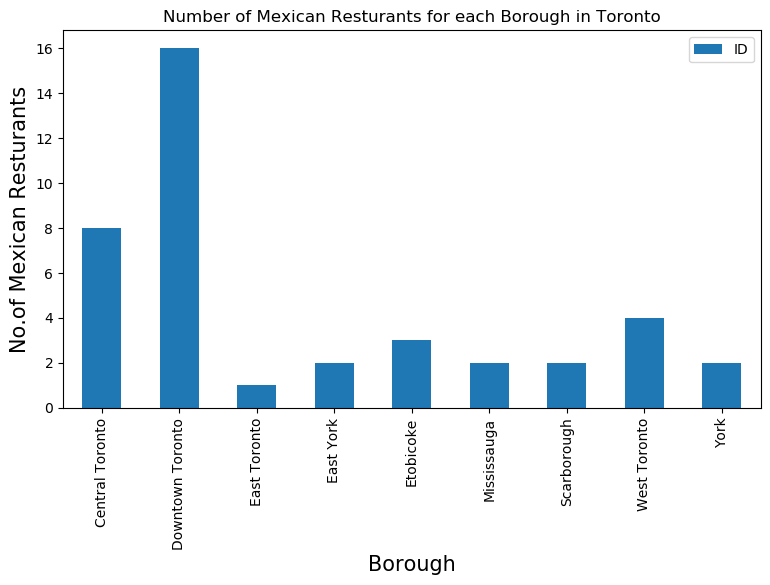

In [37]:
plt.figure(figsize=(9,5), dpi = 100)

plt.title('Number of Mexican Resturants for each Borough in Toronto')

plt.xlabel('Borough', fontsize = 15)

plt.ylabel('No.of Mexican Resturants', fontsize=15)

mexican_rest.groupby('Borough')['ID'].count().plot(kind='bar')

plt.legend()

plt.show()

### 6. Visualization of North York Borough

In [142]:
# Focusing on North York
north_york_data = df[df['Borough'] == 'North York'].reset_index(drop=True)
north_york_data.head(10)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M2H,North York,Hillcrest Village,43.803762,-79.363452
1,M2J,North York,"Henry Farm,Oriole,Fairview",43.778517,-79.346556
2,M2K,North York,Bayview Village,43.786947,-79.385975
3,M2L,North York,"Silver Hills,York Mills",43.757490,-79.374714
4,M2M,North York,"Newtonbrook,Willowdale",43.789053,-79.408493
5,M2N,North York,Willowdale South,43.770120,-79.408493
6,M2P,North York,York Mills West,43.752758,-79.400049
7,M2R,North York,Willowdale West,43.782736,-79.442259
8,M3A,North York,Parkwoods,43.753259,-79.329656
9,M3B,North York,Don Mills North,43.745906,-79.352188


In [143]:
# Get the latitude and longitude values of North York.
address = 'North York, Ontario'
geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Coordinates of North York are {}, {}.'.format(latitude, longitude))

Coordinates of North York are 43.7543263, -79.44911696639593.


In [228]:
# Create a map of North York 
map_york = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(york_data['Latitude'], york_data['Longitude'], york_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_york)  
    
map_york

### 7. Using Foursquare API to analyze choosen Borough

In [111]:
# Setting credentials
CLIENT_ID = 'URR4KNQDNYV32VZYDLGXEIY1MW4AIKGZJIPV51SZLR1BHM3U'
CLIENT_SECRET = 'FOATJ4VSOTCROUMNEAZDFADAKSIZVDZM322H5OR5D41GRTHQ'
VERSION = '20180605'

print('Credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Credentails:
CLIENT_ID: URR4KNQDNYV32VZYDLGXEIY1MW4AIKGZJIPV51SZLR1BHM3U
CLIENT_SECRET:FOATJ4VSOTCROUMNEAZDFADAKSIZVDZM322H5OR5D41GRTHQ


In [145]:
north_york_data.loc[0, 'Neighborhood']

'Hillcrest Village'

In [306]:
# Obtaining coordinates of North York
neighborhood_latitude = north_york_data.loc[0, 'Latitude']
neighborhood_longitude = north_york_data.loc[0, 'Longitude']
neighborhood_name = north_york_data.loc[0, 'Neighborhood']

In [147]:
# Get top 100 venues in Hillcrest Village within a radius of 500 m.
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?client_id=RDZDO5MSITL4N20HVKR2WPZ1RHFP3JVEI1OZHZLTRJC1MYMX&client_secret=WB3GMUZTGTJCTXN0CSCJGG54F0UBXRE1IWC5WMDJ1KSCAM4X&v=20180605&ll=43.6056466,-79.50132070000001&radius=500&limit=100'.format(CLIENT_ID, CLIENT_SECRET, VERSION, neighborhood_latitude, neighborhood_longitude, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=RDZDO5MSITL4N20HVKR2WPZ1RHFP3JVEI1OZHZLTRJC1MYMX&client_secret=WB3GMUZTGTJCTXN0CSCJGG54F0UBXRE1IWC5WMDJ1KSCAM4X&v=20180605&ll=43.6056466,-79.50132070000001&radius=500&limit=100'

In [148]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e71432ebe61c9001b74c31c'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Toronto',
  'headerFullLocation': 'Toronto',
  'headerLocationGranularity': 'city',
  'totalResults': 13,
  'suggestedBounds': {'ne': {'lat': 43.6101466045, 'lng': -79.49511771930959},
   'sw': {'lat': 43.6011465955, 'lng': -79.50752368069043}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b119977f964a520488023e3',
       'name': 'LCBO',
       'location': {'address': '2762 Lake Shore Blvd W',
        'crossStreet': 'btwn 1st & 2nd St',
        'lat': 43.60228082768786,
        'lng': -79.4993016827402,
        'labeledLatLngs': [{'label': 'display',
          'lat':

In [149]:
# Extracting category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [150]:
# json to pandas dataframe.
restaurants = results['response']['groups'][0]['items']

In [151]:
# Normalize JSON
neighborhood_restaurants = json_normalize(restaurants)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [152]:
# Filter for each row
neighborhood_restaurants['venue.categories'] = neighborhood_restaurants.apply(get_category_type, axis=1)

In [153]:
# Filter via colums
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
neighborhood_restaurants =neighborhood_restaurants.loc[:, filtered_columns]
neighborhood_restaurants.columns = [col.split(".")[-1] for col in neighborhood_restaurants.columns]

In [154]:
neighborhood_restaurants.head(10)

,name,categories,lat,lng
0,LCBO,Liquor Store,43.602281,-79.499302
1,New Toronto Fish & Chips,Restaurant,43.601849,-79.503281
2,Domino's Pizza,Pizza Place,43.601583,-79.500905
3,Delicia Bakery & Pastry,Bakery,43.601403,-79.503012
4,Lucky Dice Restaurant,Café,43.601392,-79.503056
5,Popeyes Louisiana Kitchen,Fried Chicken Joint,43.602069,-79.499400
6,McDonald's,Fast Food Restaurant,43.602464,-79.498859
7,Shoppers Drug Mart,Pharmacy,43.601677,-79.502239
8,Coffee Time,Coffee Shop,43.602284,-79.499857
9,Halibut House Fish and Chips Inc.,Seafood Restaurant,43.601960,-79.501147


In [155]:
# Repeat the same process to all the neighborhoods in North York
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [157]:
north_york_venues = getNearbyVenues(names=north_york_data['Neighborhood'],
                                   latitudes=north_york_data['Latitude'],
                                   longitudes=north_york_data['Longitude']
                                  )

Hillcrest Village
Henry Farm,Oriole,Fairview
Bayview Village
Silver Hills,York Mills
Newtonbrook,Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park,Don Mills South
Wilson Heights,Downsview North,Bathurst Manor
York University,Northwood Park
Downsview East,CFB Toronto
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Lawrence Manor East,Bedford Park
Lawrence Manor,Lawrence Heights
Glencairn
North Park,Downsview,Upwood Park
Humber Summit
Humberlea,Emery


In [158]:
north_york_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hillcrest Village,43.803762,-79.363452,Eagle's Nest Golf Club,43.805455,-79.364186,Golf Course
1,Hillcrest Village,43.803762,-79.363452,AY Jackson Pool,43.804515,-79.366138,Pool
2,Hillcrest Village,43.803762,-79.363452,Villa Madina,43.801685,-79.363938,Mediterranean Restaurant
3,Hillcrest Village,43.803762,-79.363452,Duncan Creek Park,43.805539,-79.360695,Dog Run
4,Hillcrest Village,43.803762,-79.363452,A.Y. Jackson Secondary School Track,43.805068,-79.366677,Athletics & Sports
5,"Henry Farm,Oriole,Fairview",43.778517,-79.346556,The LEGO Store,43.778207,-79.343483,Toy / Game Store
6,"Henry Farm,Oriole,Fairview",43.778517,-79.346556,Michel's Baguette,43.777082,-79.344557,Bakery
7,"Henry Farm,Oriole,Fairview",43.778517,-79.346556,CF Fairview Mall,43.777994,-79.343665,Shopping Mall
8,"Henry Farm,Oriole,Fairview",43.778517,-79.346556,DAVIDsTEA,43.777593,-79.345089,Tea Room
9,"Henry Farm,Oriole,Fairview",43.778517,-79.346556,Hero Certified Burgers,43.777295,-79.344584,Burger Joint


In [159]:
north_york_venues.shape

(238, 7)

In [191]:
north_york_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bayview Village,4,4,4,4,4,4
Don Mills North,4,4,4,4,4,4
Downsview Central,3,3,3,3,3,3
"Downsview East,CFB Toronto",3,3,3,3,3,3
Downsview Northwest,4,4,4,4,4,4
Downsview West,5,5,5,5,5,5
"Flemingdon Park,Don Mills South",21,21,21,21,21,21
Glencairn,4,4,4,4,4,4
"Henry Farm,Oriole,Fairview",62,62,62,62,62,62


In [192]:
# Integer encoded variable is removed and a new binary variable is added for each unique integer value.
north_york_onehot = pd.get_dummies(north_york_venues[['Venue Category']], prefix="", prefix_sep="")

In [193]:
# add column
north_york_onehot['Neighborhood'] = north_york_venues ['Neighborhood']

In [194]:
# move columns
columns = [north_york_onehot.columns[-1]] + list(north_york_onehot.columns[:-1])
north_york_onehot = north_york_onehot[columns]

In [195]:
# grouping
north_york_grouped = north_york_onehot.groupby('Neighborhood').mean().reset_index()
north_york_grouped.head()

,Neighborhood,Accessories Store,Airport,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bakery,Bank,Bar,Baseball Field,Beer Store,Bike Shop,Boutique,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Electronics Store,Empanada Restaurant,Event Space,Fast Food Restaurant,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hockey Arena,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Liquor Store,Lounge,Massage Studio,Mediterranean Restaurant,Metro Station,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater,Park,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Salon / Barbershop,Sandwich Place,Shoe Store,Shopping Mall,Spa,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Tailor Shop,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Video Game Store,Video Store,Vietnamese Restaurant,Women's Store
0,Bayview Village,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.25,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.00,0.25,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Don Mills North,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.25,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Downsview Central,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.333333,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Downsview East,CFB Toronto",0.0,0.333333,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Downsview Northwest,0.0,0.000000,0.0,0.0,0.0,0.25,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [196]:
# Top 4 most common venues of each neighborhood
top = 4

for hood in north_york_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = north_york_grouped[north_york_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(top))
    print('\n')

----Bayview Village----
                 venue  freq
0   Chinese Restaurant  0.25
1                 Café  0.25
2                 Bank  0.25
3  Japanese Restaurant  0.25


----Don Mills North----
                  venue  freq
0  Gym / Fitness Center  0.25
1  Caribbean Restaurant  0.25
2                  Café  0.25
3   Japanese Restaurant  0.25


----Downsview Central----
               venue  freq
0  Korean Restaurant  0.33
1         Food Truck  0.33
2     Baseball Field  0.33
3       Liquor Store  0.00


----Downsview East,CFB Toronto----
         venue  freq
0   Playground  0.33
1         Park  0.33
2      Airport  0.33
3  Video Store  0.00


----Downsview Northwest----
                venue  freq
0         Coffee Shop  0.25
1  Athletics & Sports  0.25
2        Liquor Store  0.25
3       Grocery Store  0.25


----Downsview West----
           venue  freq
0  Grocery Store   0.4
1          Hotel   0.2
2           Park   0.2
3           Bank   0.2


----Flemingdon Park,Don Mills South---

In [197]:
# Sorting venues defintion 
def top_common_venues(row, top):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top]

In [198]:
top = 15
indicators = ['st', 'nd', 'rd']

In [206]:
# Columns in order to number of top venues
columns = ['Neighborhood']
for ind in np.arange(top):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
df_sorted_venues = pd.DataFrame(columns=columns)
df_sorted_venues['Neighborhood'] = north_york_grouped['Neighborhood']

for ind in np.arange(north_york_grouped.shape[0]):
    df_sorted_venues.iloc[ind, 1:] = top_common_venues(north_york_grouped.iloc[ind, :], top)

In [207]:
 df_sorted_venues

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Bayview Village,Japanese Restaurant,Chinese Restaurant,Café,Bank,Dog Run,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Discount Store,Women's Store
1,Don Mills North,Caribbean Restaurant,Gym / Fitness Center,Café,Japanese Restaurant,Women's Store,Discount Store,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Dog Run
2,Downsview Central,Food Truck,Baseball Field,Korean Restaurant,Women's Store,Discount Store,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Dog Run
3,"Downsview East,CFB Toronto",Park,Airport,Playground,Diner,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Women's Store,Clothing Store
4,Downsview Northwest,Coffee Shop,Grocery Store,Athletics & Sports,Liquor Store,Discount Store,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Women's Store
5,Downsview West,Grocery Store,Park,Hotel,Bank,Discount Store,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Women's Store
6,"Flemingdon Park,Don Mills South",Coffee Shop,Beer Store,Asian Restaurant,Gym,Restaurant,Clothing Store,Concert Hall,Chinese Restaurant,Japanese Restaurant,Italian Restaurant,Dim Sum Restaurant,Discount Store,Bike Shop,Sandwich Place,Sporting Goods Shop
7,Glencairn,Japanese Restaurant,Asian Restaurant,Metro Station,Pub,Women's Store,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Discount Store
8,"Henry Farm,Oriole,Fairview",Clothing Store,Coffee Shop,Fast Food Restaurant,Women's Store,Juice Bar,Toy / Game Store,Bakery,Japanese Restaurant,Food Court,Convenience Store,Liquor Store,Electronics Store,Department Store,Deli / Bodega,Cosmetics Shop
9,Hillcrest Village,Golf Course,Athletics & Sports,Pool,Mediterranean Restaurant,Dog Run,Food Truck,Fried Chicken Joint,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Furniture / Home Store,Convenience Store,Frozen Yogurt Shop,Cosmetics Shop,Deli / Bodega


### 8. k-means clustering

In [208]:
# Settig clustering
kclusters = 8
north_york_grouped_clustering = north_york_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(north_york_grouped_clustering)
kmeans.labels_[0:10] 

array([6, 6, 7, 4, 0, 1, 1, 6, 1, 1], dtype=int32)

In [209]:
# Adding label
df_sorted_venues.insert(0, 'Cluster Labels', kmeans.labels_)

# Creating north_york_2 data frame
north_york_2 = north_york_data

# Merging data frames
north_york_2 = north_york_2.join(df_sorted_venues.set_index('Neighborhood'), on='Neighborhood')

# Drop NaN
north_york_2.dropna(axis=0, how='any',inplace=True)
north_york_2.reset_index(inplace=True, drop=True)

In [210]:
north_york_2

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,M2H,North York,Hillcrest Village,43.803762,-79.363452,1.0,Golf Course,Athletics & Sports,Pool,Mediterranean Restaurant,Dog Run,Food Truck,Fried Chicken Joint,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Furniture / Home Store,Convenience Store,Frozen Yogurt Shop,Cosmetics Shop,Deli / Bodega
1,M2J,North York,"Henry Farm,Oriole,Fairview",43.778517,-79.346556,1.0,Clothing Store,Coffee Shop,Fast Food Restaurant,Women's Store,Juice Bar,Toy / Game Store,Bakery,Japanese Restaurant,Food Court,Convenience Store,Liquor Store,Electronics Store,Department Store,Deli / Bodega,Cosmetics Shop
2,M2K,North York,Bayview Village,43.786947,-79.385975,6.0,Japanese Restaurant,Chinese Restaurant,Café,Bank,Dog Run,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Discount Store,Women's Store
3,M2L,North York,"Silver Hills,York Mills",43.757490,-79.374714,3.0,Cafeteria,Women's Store,Discount Store,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Dog Run,Clothing Store,Electronics Store
4,M2N,North York,Willowdale South,43.770120,-79.408493,1.0,Ramen Restaurant,Pizza Place,Sandwich Place,Shopping Mall,Restaurant,Coffee Shop,Café,Sushi Restaurant,Middle Eastern Restaurant,Indonesian Restaurant,Movie Theater,Pet Store,Juice Bar,Ice Cream Shop,Hotel
5,M2P,North York,York Mills West,43.752758,-79.400049,1.0,Park,Convenience Store,Bank,Women's Store,Discount Store,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Dog Run,Clothing Store
6,M2R,North York,Willowdale West,43.782736,-79.442259,1.0,Pharmacy,Bank,Pizza Place,Butcher,Discount Store,Coffee Shop,Grocery Store,Food Court,Department Store,Frozen Yogurt Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop
7,M3A,North York,Parkwoods,43.753259,-79.329656,4.0,Park,Food & Drink Shop,Bus Stop,Women's Store,Diner,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Discount Store,Clothing Store
8,M3B,North York,Don Mills North,43.745906,-79.352188,6.0,Caribbean Restaurant,Gym / Fitness Center,Café,Japanese Restaurant,Women's Store,Discount Store,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Dog Run
9,M3C,North York,"Flemingdon Park,Don Mills South",43.725900,-79.340923,1.0,Coffee Shop,Beer Store,Asian Restaurant,Gym,Restaurant,Clothing Store,Concert Hall,Chinese Restaurant,Japanese Restaurant,Italian Restaurant,Dim Sum Restaurant,Discount Store,Bike Shop,Sandwich Place,Sporting Goods Shop


In [211]:
north_york_2.shape

(23, 21)

### 9. Analyze clusters

In [220]:
north_york_2.groupby('Cluster Labels').count()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
Cluster Labels,,,,,,,,,,,,,,,,,,,,
0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1.0,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
2.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4.0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
5.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6.0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
7.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [221]:
#1st Cluster
north_york_2.loc[north_york_2['Cluster Labels'] == 0, north_york_2.columns[[2] + list(range(6, north_york_2.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
15,Downsview Northwest,Coffee Shop,Grocery Store,Athletics & Sports,Liquor Store,Discount Store,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Women's Store


In [222]:
#2nd Cluster
north_york_2.loc[north_york_2['Cluster Labels'] == 1, north_york_2.columns[[2] + list(range(6, north_york_2.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Hillcrest Village,Golf Course,Athletics & Sports,Pool,Mediterranean Restaurant,Dog Run,Food Truck,Fried Chicken Joint,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Furniture / Home Store,Convenience Store,Frozen Yogurt Shop,Cosmetics Shop,Deli / Bodega
1,"Henry Farm,Oriole,Fairview",Clothing Store,Coffee Shop,Fast Food Restaurant,Women's Store,Juice Bar,Toy / Game Store,Bakery,Japanese Restaurant,Food Court,Convenience Store,Liquor Store,Electronics Store,Department Store,Deli / Bodega,Cosmetics Shop
4,Willowdale South,Ramen Restaurant,Pizza Place,Sandwich Place,Shopping Mall,Restaurant,Coffee Shop,Café,Sushi Restaurant,Middle Eastern Restaurant,Indonesian Restaurant,Movie Theater,Pet Store,Juice Bar,Ice Cream Shop,Hotel
5,York Mills West,Park,Convenience Store,Bank,Women's Store,Discount Store,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Dog Run,Clothing Store
6,Willowdale West,Pharmacy,Bank,Pizza Place,Butcher,Discount Store,Coffee Shop,Grocery Store,Food Court,Department Store,Frozen Yogurt Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop
9,"Flemingdon Park,Don Mills South",Coffee Shop,Beer Store,Asian Restaurant,Gym,Restaurant,Clothing Store,Concert Hall,Chinese Restaurant,Japanese Restaurant,Italian Restaurant,Dim Sum Restaurant,Discount Store,Bike Shop,Sandwich Place,Sporting Goods Shop
10,"Wilson Heights,Downsview North,Bathurst Manor",Coffee Shop,Diner,Deli / Bodega,Ice Cream Shop,Bridal Shop,Pizza Place,Restaurant,Pharmacy,Sandwich Place,Convenience Store,Shopping Mall,Bank,Supermarket,Sushi Restaurant,Middle Eastern Restaurant
11,"York University,Northwood Park",Furniture / Home Store,Caribbean Restaurant,Miscellaneous Shop,Massage Studio,Bar,Coffee Shop,Diner,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Discount Store
13,Downsview West,Grocery Store,Park,Hotel,Bank,Discount Store,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Women's Store
16,Victoria Village,Coffee Shop,Portuguese Restaurant,Hockey Arena,Intersection,Discount Store,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Women's Store


In [223]:
#3rd Cluster
north_york_2.loc[north_york_2['Cluster Labels'] == 2, north_york_2.columns[[2] + list(range(6, north_york_2.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
22,"Humberlea,Emery",Baseball Field,Women's Store,Dog Run,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Discount Store,Electronics Store,Clothing Store


In [224]:
#4th Cluster
north_york_2.loc[north_york_2['Cluster Labels'] == 3, north_york_2.columns[[2] + list(range(6, north_york_2.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
3,"Silver Hills,York Mills",Cafeteria,Women's Store,Discount Store,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Dog Run,Clothing Store,Electronics Store


In [225]:
#5th Cluster
north_york_2.loc[north_york_2['Cluster Labels'] == 4, north_york_2.columns[[2] + list(range(6, north_york_2.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
7,Parkwoods,Park,Food & Drink Shop,Bus Stop,Women's Store,Diner,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Discount Store,Clothing Store
12,"Downsview East,CFB Toronto",Park,Airport,Playground,Diner,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Women's Store,Clothing Store
20,"North Park,Downsview,Upwood Park",Park,Construction & Landscaping,Bakery,Women's Store,Discount Store,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Dog Run,Clothing Store


In [226]:
#6th Cluster
north_york_2.loc[north_york_2['Cluster Labels'] == 5, north_york_2.columns[[2] + list(range(6, north_york_2.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
21,Humber Summit,Pizza Place,Empanada Restaurant,Discount Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Dog Run,Chocolate Shop


In [227]:
#7th Cluster
north_york_2.loc[north_york_2['Cluster Labels'] == 6, north_york_2.columns[[2] + list(range(6, north_york_2.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
2,Bayview Village,Japanese Restaurant,Chinese Restaurant,Café,Bank,Dog Run,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Discount Store,Women's Store
8,Don Mills North,Caribbean Restaurant,Gym / Fitness Center,Café,Japanese Restaurant,Women's Store,Discount Store,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Dog Run
19,Glencairn,Japanese Restaurant,Asian Restaurant,Metro Station,Pub,Women's Store,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Discount Store


### 10. Visualization with use of Folium

In [218]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(north_york_2['Latitude'], north_york_2['Longitude'], north_york_2['Neighborhood'], north_york_2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters